In [1]:
import math
import time
import cv2
from matplotlib import pyplot as plt

In [2]:
from droidlet.lowlevel.hello_robot.hello_robot_mover import HelloRobotMover

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [62]:
mover = HelloRobotMover(ip="100.95.90.42")
# mover = HelloRobotMover(ip="100.72.46.5")


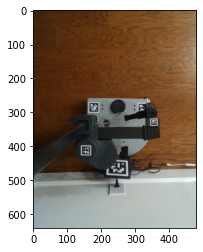

In [69]:
rgb_depth = mover.get_rgb_depth()
img = rgb_depth.rgb
plt.imshow(img)

In [138]:
mover.bot.set_pan(0.0)
time.sleep(2)
mover.bot.set_tilt(- math.radians(60))
time.sleep(2)

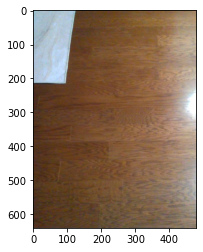

In [139]:
rgb_depth = mover.get_rgb_depth()
img = rgb_depth.rgb
plt.imshow(img)

In [140]:
img.shape

(640, 480, 3)

In [141]:
ARUCO_DICT = {
    # "DICT_6X6_250": cv2.aruco.DICT_6X6_250,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
}


In [142]:
for name, ar in ARUCO_DICT.items():
    arucoDict = cv2.aruco.Dictionary_get(ar)
    arucoParams = cv2.aruco.DetectorParameters_create()
    (corners, ids, rejected) = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)
    if len(corners) > 0:
        print(name, corners, ids, rejected)

In [143]:
image = img.copy()
depth = rgb_depth.depth
if len(corners) > 0:
    # flatten the ArUco IDs list
    ids = ids.flatten()
    # loop over the detected ArUCo corners
    for (markerCorner, markerID) in zip(corners, ids):
        # extract the marker corners (which are always returned in
        # top-left, top-right, bottom-right, and bottom-left order)
        corners_ = markerCorner.reshape((4, 2))
        (topLeft, topRight, bottomRight, bottomLeft) = corners_
        # convert each of the (x, y)-coordinate pairs to integers
        topRight = (int(topRight[0]), int(topRight[1]))
        bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
        bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
        topLeft = (int(topLeft[0]), int(topLeft[1]))
        # draw the bounding box of the ArUCo detection
        print(depth[topLeft[1], topLeft[0]], depth[topRight[1], topRight[0]],
              depth[bottomLeft[1], bottomLeft[0]], depth[bottomRight[1], bottomRight[0]])
        cv2.line(image, topLeft, topRight, (0, 255, 0), 2)
        cv2.line(image, topRight, bottomRight, (0, 255, 0), 2)
        cv2.line(image, bottomRight, bottomLeft, (0, 255, 0), 2)
        cv2.line(image, bottomLeft, topLeft, (0, 255, 0), 2)
        # compute and draw the center (x, y)-coordinates of the ArUco
        # marker
        cX = int((topLeft[0] + bottomRight[0]) / 2.0)
        cY = int((topLeft[1] + bottomRight[1]) / 2.0)
        cv2.circle(image, (cX, cY), 4, (0, 0, 255), -1)
        # draw the ArUco marker ID on the image
        cv2.putText(image, str(markerID),
            (topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 2)
        print("[INFO] ArUco marker ID: {}".format(markerID))
        # show the output image
        plt.imshow(image)


In [144]:
print(depth.shape)
print(img.shape)

(640, 480)
(640, 480, 3)


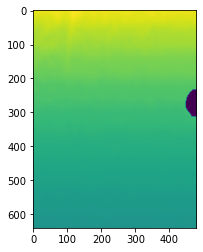

In [145]:
plt.imshow(depth)

In [146]:
pcd = rgb_depth.ptcloud

In [147]:
import open3d as o3d
import numpy as np

In [148]:
pcd.shape

(640, 480, 3)

In [149]:
opcd = o3d.geometry.PointCloud()
opcd.points = o3d.utility.Vector3dVector(pcd.reshape(-1, 3))

In [150]:
from droidlet.lowlevel.hello_robot.remote.obstacle_utils import get_ground_plane

In [151]:
ground, rest = get_ground_plane(opcd)

In [152]:
npcd = np.asarray(ground.points)

In [153]:
npcd.shape

(305094, 3)

In [154]:
z = npcd[:, 2]

In [155]:
print(z.min(), z.max(), np.median(z), z.mean(), z.std())

-0.025487057239630184 0.05417996507713396 0.015724582016405808 0.015601487585093625 0.011511410840965351
